In [1]:
import pandas as pd, datetime as dt
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from utils import load_workout_spreadsheet

In [3]:
# load spreadsheet of stats
stats = load_workout_spreadsheet()
stats.tail()

,WeekDay,Pull ups,Press ups,Squats,Lunges,Flutter kicks,Mountain climbers,Burpees,Sit ups,Sandbag Cleans,...,Yes's,Nos,2 Pump Burpees,Man maker,Thruster,Hip Thrust,20 yd sprints,Tactical Pro Agility Drill,Run (km),WeekStartDate
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-29,NaN,26.0,160.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-26
2021-04-30,NaN,14.0,90.0,NaN,NaN,NaN,NaN,NaN,55.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2021-04-26
2021-05-01,NaN,NaN,60.0,60.0,60.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,2021-04-26
2021-05-02,NaN,NaN,150.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-26
2021-05-04,NaN,27.0,160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-03


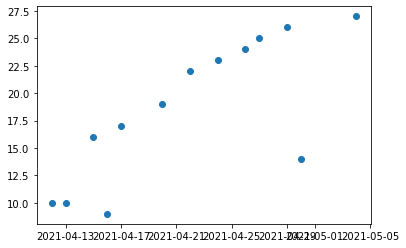

In [4]:
def plot_exercise(index_vals, reps):
    plt.figure()
    plt.scatter(index_vals, reps)
    plt.show()
    
plot_exercise(stats.index, stats["Pull ups"])

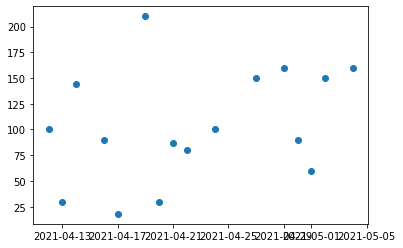

In [5]:
plt.scatter(stats.index, stats["Press ups"])

In [6]:
perweek = stats.groupby(stats['WeekStartDate']).sum()
perweek

,WeekDay,Pull ups,Press ups,Squats,Lunges,Flutter kicks,Mountain climbers,Burpees,Sit ups,Sandbag Cleans,...,Kettlebell swings,Yes's,Nos,2 Pump Burpees,Man maker,Thruster,Hip Thrust,20 yd sprints,Tactical Pro Agility Drill,Run (km)
WeekStartDate,,,,,,,,,,,,,,,,,,,,,
2021-04-12,0.0,62.0,382.0,228.0,132.0,18.0,18.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,84.0,0.0,0.0,0.0
2021-04-19,0.0,64.0,507.0,430.0,45.0,50.0,50.0,40.0,20.0,30.0,...,0.0,313.0,313.0,80.0,0.0,8.0,0.0,0.0,0.0,0.0
2021-04-26,0.0,89.0,610.0,270.0,173.0,150.0,113.0,113.0,55.0,150.0,...,0.0,0.0,0.0,0.0,30.0,0.0,0.0,6.0,6.0,5.0
2021-05-03,0.0,27.0,160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
perweek.pct_change()

,WeekDay,Pull ups,Press ups,Squats,Lunges,Flutter kicks,Mountain climbers,Burpees,Sit ups,Sandbag Cleans,...,Kettlebell swings,Yes's,Nos,2 Pump Burpees,Man maker,Thruster,Hip Thrust,20 yd sprints,Tactical Pro Agility Drill,Run (km)
WeekStartDate,,,,,,,,,,,,,,,,,,,,,
2021-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-19,NaN,0.032258,0.327225,0.885965,-0.659091,1.777778,1.777778,inf,inf,inf,...,NaN,inf,inf,inf,NaN,inf,-1.0,NaN,NaN,NaN
2021-04-26,NaN,0.390625,0.203156,-0.372093,2.844444,2.000000,1.260000,1.825,1.75,4.0,...,NaN,-1.0,-1.0,-1.0,inf,-1.0,NaN,inf,inf,inf
2021-05-03,NaN,-0.696629,-0.737705,-1.000000,-1.000000,-1.000000,-1.000000,-1.000,-1.00,-1.0,...,inf,NaN,NaN,NaN,-1.0,NaN,NaN,-1.0,-1.0,-1.0


- return the number of reps left to make
- return the average number of reps for next weeks workouts

In [8]:
def estimate_next_week_reps(prev_week_reps: int) -> int:
    """Calculate the mean number of reps per workout to beat previous week.
    """
    if prev_week_reps == 0.0:
        return 1.0
    return np.ceil((prev_week_reps + 1) / 4)


for exercise in perweek:
    # get the maximum reps for each exercise
    max_reps = perweek[exercise].max()
    av_reps = estimate_next_week_reps(max_reps)
    print("{0}, max weekly reps are {1}, aim for {2} in next workout".format(exercise, int(max_reps), int(av_reps)))
#     print(perweek[exercise][-1])

WeekDay, max weekly reps are 0, aim for 1 in next workout
Pull ups, max weekly reps are 89, aim for 23 in next workout
Press ups, max weekly reps are 610, aim for 153 in next workout
Squats, max weekly reps are 430, aim for 108 in next workout
Lunges, max weekly reps are 173, aim for 44 in next workout
Flutter kicks, max weekly reps are 150, aim for 38 in next workout
Mountain climbers, max weekly reps are 113, aim for 29 in next workout
Burpees, max weekly reps are 113, aim for 29 in next workout
Sit ups, max weekly reps are 55, aim for 14 in next workout
Sandbag Cleans, max weekly reps are 150, aim for 38 in next workout
Kettlebell Cleans, max weekly reps are 0, aim for 1 in next workout
Kettlebell press, max weekly reps are 35, aim for 9 in next workout
Kettlebell swings, max weekly reps are 70, aim for 18 in next workout
Yes's, max weekly reps are 313, aim for 79 in next workout
Nos, max weekly reps are 313, aim for 79 in next workout
2 Pump Burpees, max weekly reps are 80, aim for